# 단순 선형 회귀

* scikit-learn 패키지의 LinearRegression은 OLS(Ordinary Least Squares)방식으로 선형 회귀 모델을 구현

    => 계수를 사용해 선형 모델을 피팅하여 관측값과 예측값 간 잔차제곱합을 최소화한다.

In [2]:
from sklearn.linear_model import LinearRegression # 단순선형회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* 보험가입자 데이터

    1. 나이
    2. 성별
    3. 비만도
    4. 자녀 수
    5. 흡연여부
    6. 주거지역
    7. 의료비용

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


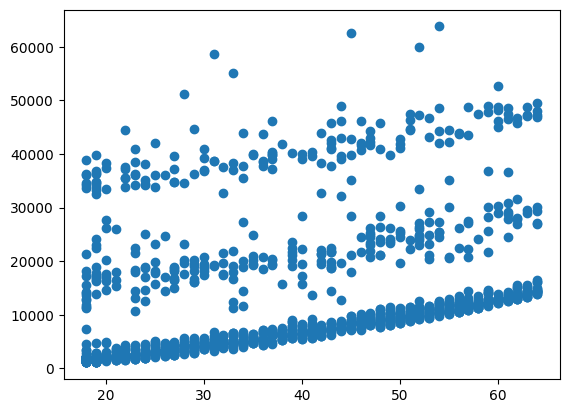

In [4]:
# 선형성 확인 (산점도)
x_graph = data['age']
y = data['charges']
plt.scatter(x_graph, y)
plt.show();

In [5]:
lr = LinearRegression() # 회귀 모델 객체 생성
# 모델 학습
x = data[['age']]
lr.fit(x, y)


LinearRegression()

In [6]:
print(f'절편: {lr.intercept_}, 회귀계수: {lr.coef_}')
print(f'결정계수: {lr.score(x,y)}') # R2

절편: 3165.8850060630284, 회귀계수: [257.72261867]
결정계수: 0.08940589967885804


In [7]:
# 예측
x_test = [[19], [64]]
y_hat = lr.predict(x_test)
y_hat


/Users/sai/anaconda3/envs/section4_pj/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 8062.61476073, 19660.13260074])

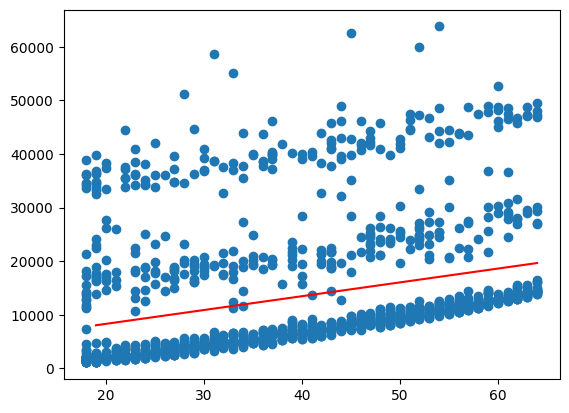

In [14]:
# 산점도 위에 회귀선 그리기
x_graph = data['age']
y = data['charges']
plt.scatter(x_graph, y)
plt.plot(x_test, y_hat, 'r')
plt.show();

## Model-Tuning
* GD(gradient Descent)

    ```from sklearn.linear_model import SGDRegressor```
1. 배치 경사하강법

    반복 시 전체 훈련셋을 사용해 가중치 갱신 -> 전체라서 오래 걸림
2. 확률적 경사하강법

    한 개의 랜덤 샘플에 대한 경사를 계산  -> 로컬 미니멈에 빠질 가능성
3. 미니 배치 경사하강법

    스텝 반복 시 n개의 관측값으로 가중치 갱신 -> 2번 방법보다 오차율이 낮음

In [33]:
from sklearn.linear_model import SGDRegressor # 확률적 경사하강법(One Sample)
 
gdr = SGDRegressor(
    # # loss=, # 모니터링할 지표 ('squared_error')
    # penalty='l2', # 패널티 방법(l1, l2, elastic net)
    # alpha=0.0001, # 정규화 상수항
    # # l1_ratio=, 엘라스틱 패널티에서만 적용 l1 반영 비율 default=0.15
    max_iter=1000, # 최대 반복 횟수?
    random_state=2,
    # learning_rate='invscaling', # 학습률 일정 (eta값에 따라)
    
)
gdr.fit(x,y)

SGDRegressor(random_state=2)

In [34]:
print(f"회귀계수: {gdr.coef_}")
print(f"절편: {gdr.intercept_}")
print(f"반복 횟수: {gdr.n_iter_}")
print(f"가중치 업데이트 횟수: {gdr.t_}")

회귀계수: [257.33834658]
절편: [-2215.03863982]
반복 횟수: 136
가중치 업데이트 횟수: 181969.0


[ 2674.38994511 14254.61554101]


/Users/sai/anaconda3/envs/section4_pj/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


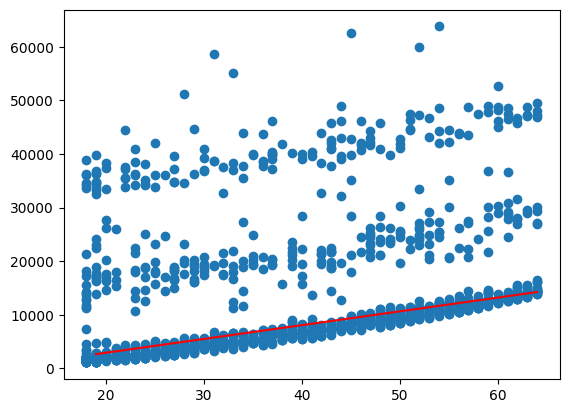

In [35]:
# 예측
y_hat = gdr.predict(x_test)
print(y_hat)
# 회귀선 시각화
plt.scatter(x_graph, y)
plt.plot(x_test, y_hat, 'r')
plt.show();

In [36]:
# 결정계수
gdr.score(x,y)

-0.1092851436966562